<a href="https://colab.research.google.com/github/3B032049/2025_ML_hws/blob/main/hw4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

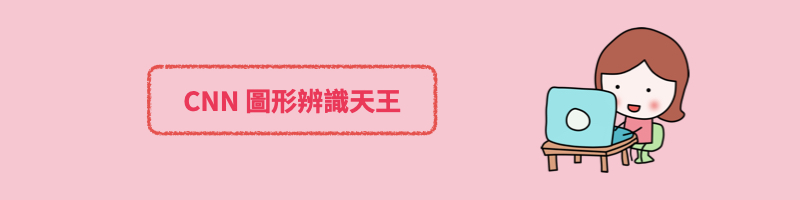

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [71]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Dropout


In [72]:
# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2025-04-23 05:25:20--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.188.139, 142.251.188.101, 142.251.188.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.188.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-23 05:25:20--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-04-23 

### 1. 讀入 CIFAR-10 數據集

CIFAR-10 是一個小尺吋（32x32）彩色圖片資料集，其中，訓練集包含了 50000 張大小為 32x32 的彩色圖片；測試集包含了 10000 張大小為 32x32 的彩色圖片。CIFAR-10 的圖片資料可分為以下 10 個種類：
* 飛機 (airplan)
* 交通工具 (automobile)
* 鳥 (bird)
* 貓 (cat)
* 鹿 (deer)
* 狗 (dog)
* 青蛙 (frog)
* 馬 (horse)
* 船 (ship)
* 卡車 (truck)

在這裡，我們將讓大家練習建構在 CIFAR-10 上的 CNN 分類模型


In [73]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. 資料整理

#### 資料尺寸與通道數（Channel）

由於 CNN 模型的輸入資料必須是圖片，所以我們需要注意一張圖有多少個 channel。

因為CIFAR-10資料集的資料為彩色圖片，每一個像素點，其實包含了紅色（Red）、綠色（Green）以及藍色（Blue）三原色的強度，所以每一張圖有三個 channel，以及代表三種顏色的強度。

In [74]:
x_train.shape

(50000, 32, 32, 3)

In [75]:
y_train.shape

(50000, 1)

In [76]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [77]:
print(f"資料的最小值: {np.min(x_train)}")
print(f"資料的最大值: {np.max(x_train)}")

資料的最小值: 0
資料的最大值: 255


In [78]:
print(f"資料的最小值: {np.min(x_test)}")
print(f"資料的最大值: {np.max(x_test)}")

資料的最小值: 0
資料的最大值: 255


In [79]:
x_train = x_train/255
x_test = x_test/255

In [80]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [81]:
y_train.shape

(50000, 10)

### 3. step 1: 打造函數學習機 (CNN)

In [82]:
model = Sequential()

In [83]:
model.add(Conv2D(16, (5, 5), padding='same',
                 input_shape=(32, 32, 3),
                 activation='relu'))

In [84]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,216 (4.75 KB)

 Trainable params: 1,216 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.add(MaxPool2D())

In [86]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,216 (4.75 KB)

 Trainable params: 1,216 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))

In [88]:
model.add(MaxPool2D())

In [89]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,048 (54.88 KB)

 Trainable params: 14,048 (54.88 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D())

In [91]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,312 (255.12 KB)

 Trainable params: 65,312 (255.12 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.add(Flatten())

In [93]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,312 (255.12 KB)

 Trainable params: 65,312 (255.12 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.5))

#### 看一下我們的神經網路

In [95]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

#### 組裝

In [96]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

### 4. step 2: fit

In [97]:
train_history =model.fit( x_train, y_train ,validation_split=0.2,epochs=20 , batch_size=128,verbose=2)

Epoch 1/20
313/313 - 8s - 27ms/step - accuracy: 0.2348 - loss: nan - val_accuracy: 0.4029 - val_loss: 1.6486
Epoch 2/20
313/313 - 5s - 16ms/step - accuracy: 0.2991 - loss: nan - val_accuracy: 0.4797 - val_loss: 1.4319
Epoch 3/20
313/313 - 2s - 8ms/step - accuracy: 0.3266 - loss: nan - val_accuracy: 0.5166 - val_loss: 1.3548
Epoch 4/20
313/313 - 3s - 8ms/step - accuracy: 0.3385 - loss: nan - val_accuracy: 0.5475 - val_loss: 1.2694
Epoch 5/20
313/313 - 3s - 9ms/step - accuracy: 0.3499 - loss: nan - val_accuracy: 0.5840 - val_loss: 1.1728
Epoch 6/20
313/313 - 2s - 6ms/step - accuracy: 0.3636 - loss: nan - val_accuracy: 0.5801 - val_loss: 1.1784
Epoch 7/20
313/313 - 3s - 8ms/step - accuracy: 0.3683 - loss: nan - val_accuracy: 0.6241 - val_loss: 1.0746
Epoch 8/20
313/313 - 3s - 8ms/step - accuracy: 0.3808 - loss: nan - val_accuracy: 0.6191 - val_loss: 1.0850
Epoch 9/20
313/313 - 2s - 6ms/step - accuracy: 0.3832 - loss: nan - val_accuracy: 0.6229 - val_loss: 1.0647
Epoch 10/20
313/313 - 3s -

In [98]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

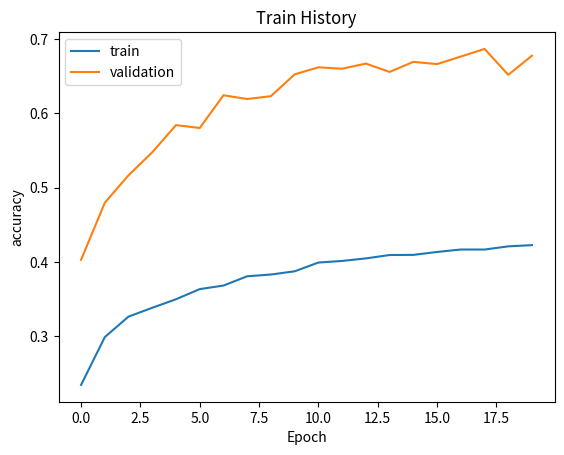

In [99]:
show_train_history(train_history,'accuracy','val_accuracy')

In [100]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

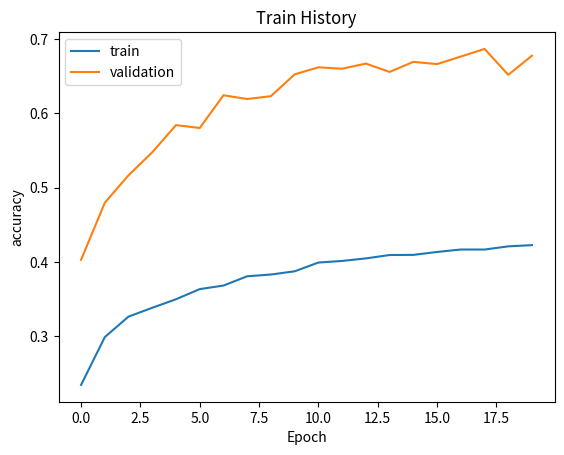

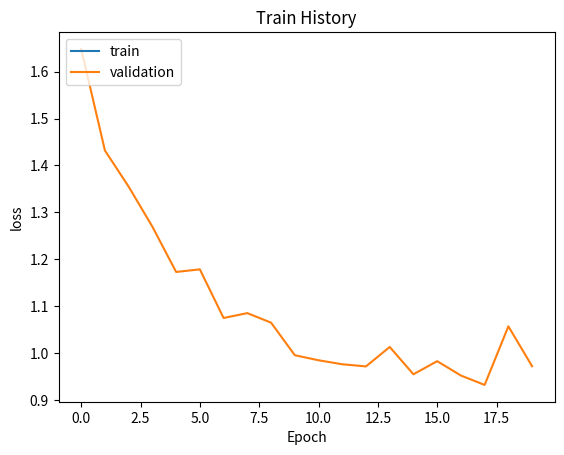

In [101]:
# 繪製 Accuracy 圖
show_train_history(train_history, 'accuracy', 'val_accuracy')
# 繪製 Loss 圖
show_train_history(train_history, 'loss', 'val_loss')

### 5. Step 3: 預測

In [102]:
x_test[5].shape

(32, 32, 3)

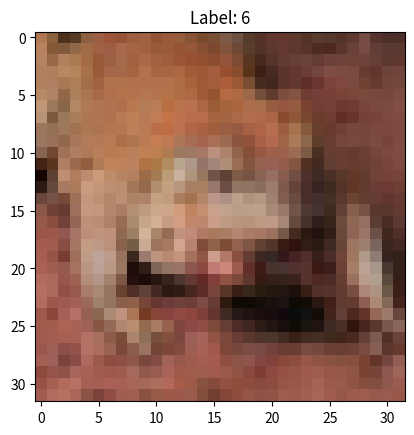

In [103]:
plt.imshow(x_test[5])
plt.title(f"Label: {y_test[5].argmax()}");

In [104]:
inp = x_test[5].reshape(1, 32, 32, 3)

In [105]:
model.predict(inp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


array([[2.2508144e-04, 8.7311985e-03, 6.3520847e-03, 7.6342109e-03,
        2.9249397e-01, 1.1625504e-02, 6.5780020e-01, 9.6596349e-03,
        1.7041840e-04, 5.3077550e-03]], dtype=float32)

In [106]:
np.argmax(model.predict(inp), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([6])

In [107]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


神經網路預測是: 6


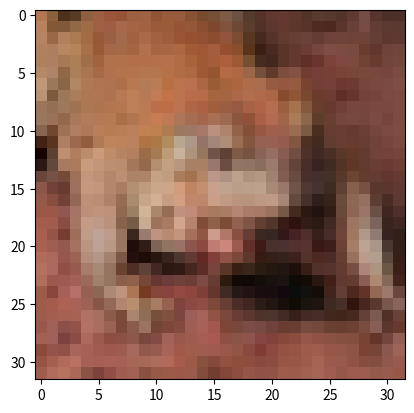

In [108]:
n = 5

print('神經網路預測是:', y_predict[n])
plt.imshow(x_test[n], cmap='Greys');

In [109]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6707 - loss: 0.9776


In [110]:
print(f"loss: {score[0]}")
print(f"正確率: {score[1]*100:.2f}%")

loss: 0.9775240421295166
正確率: 67.12%


### 6. 更酷炫的互動呈現

我們先來準備標籤資料的中英文對照

In [111]:
#from ipywidgets import interact_manual

In [112]:
class_name = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

In [113]:
def test(測試編號):
    plt.imshow(x_test[測試編號], cmap='Greys')
    print('神經網路判斷為:', class_name[y_predict[測試編號]])

In [114]:
#interact_manual(test, 測試編號=(0, 9999));

到底測試資料整體的表現如何呢？我們可以給神經網路「總評量」。

In [115]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6707 - loss: 0.9776


In [116]:
print(f"loss: {score[0]}")
print(f" 正確率 : {score[1]*100:.2f}%")

loss: 0.9775240421295166
 正確率 : 67.12%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


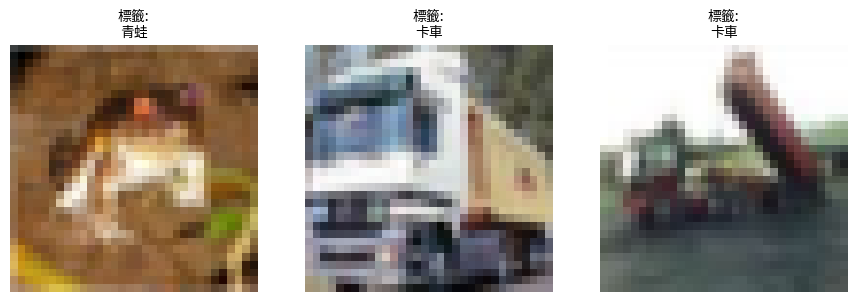

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import random


predictions = model.predict(x_test)



# 顯示三張訓練圖片與其對應標籤
plt.figure(figsize=(9, 3))
for i in range(3):
    idx = random.randint(0, len(x_test)-1)
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    pred_label = class_name[np.argmax(predictions[idx])]
    plt.title("標籤:\n" + class_name[np.argmax(y_train[i])], fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

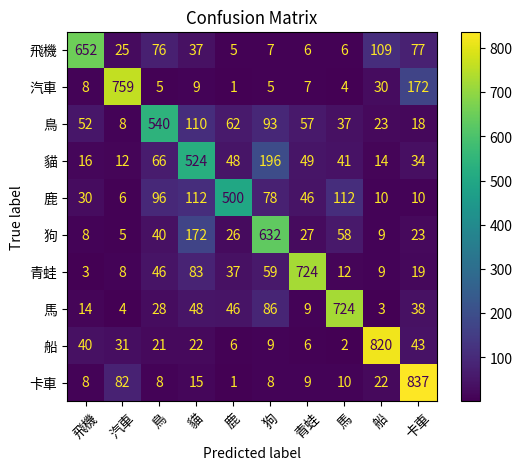

In [120]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()